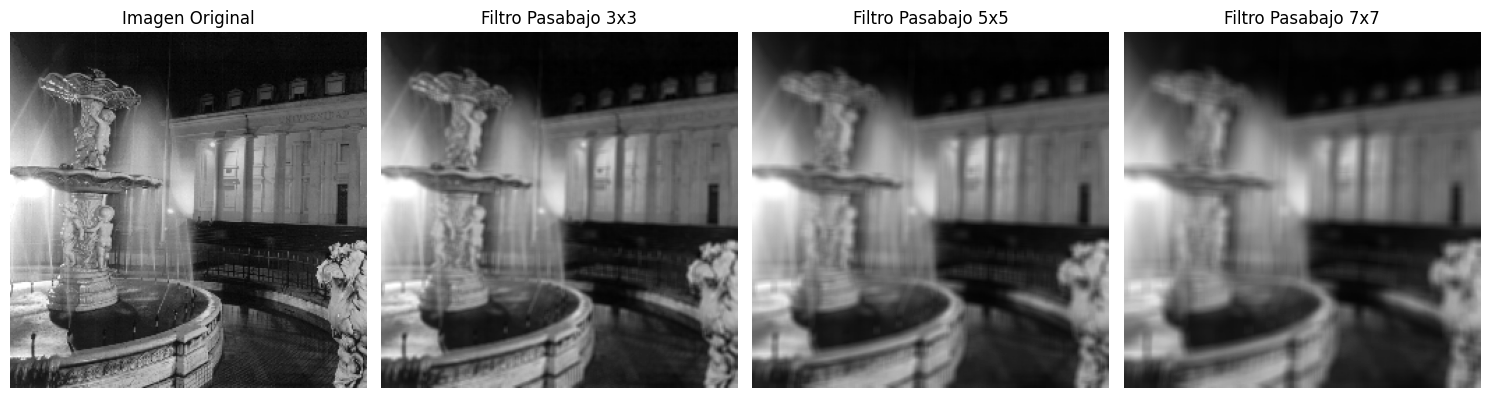

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('../IMAGENES/fuente.bmp', 0)  # Cargar en escala de grises


# Filtros Pasabajos: Filtro de Media (Plano)

# Definir kernels para diferentes tamaños (3x3, 5x5, 7x7)
kernel_3x3 = np.ones((3, 3), np.float32) / 9
kernel_5x5 = np.ones((5, 5), np.float32) / 25
kernel_7x7 = np.ones((7, 7), np.float32) / 49

# Aplicar filtros de media
img_filtered_3x3 = cv2.filter2D(img, -1, kernel_3x3)
img_filtered_5x5 = cv2.filter2D(img, -1, kernel_5x5)
img_filtered_7x7 = cv2.filter2D(img, -1, kernel_7x7)

# Mostrar resultados de los filtros pasabajos
plt.figure(figsize=(15, 5))
def mostrarImg(x,title,nombre):
    plt.subplot(1,4,x)
    plt.imshow(nombre, cmap='gray')
    plt.title(title)
    plt.axis('off')

mostrarImg(1,'Imagen Original',img)
mostrarImg(2,'Filtro Pasabajo 3x3',img_filtered_3x3)
mostrarImg(3,'Filtro Pasabajo 5x5',img_filtered_5x5)
mostrarImg(4,'Filtro Pasabajo 7x7',img_filtered_7x7)

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.06230936819172113..1.4444444444444442].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.07513725490196078..1.0000000000000002].


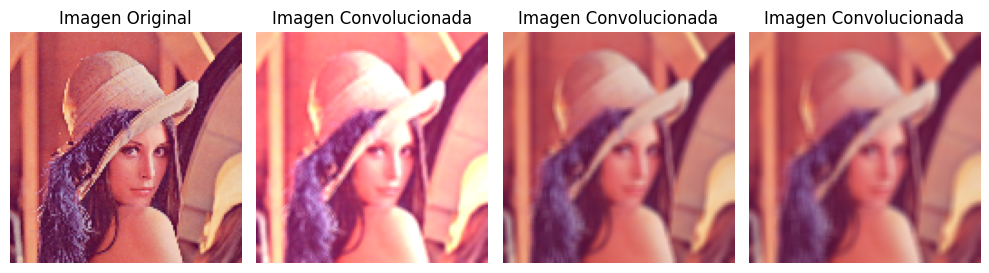

In [40]:
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Cargar imagen
img = imageio.imread('../IMAGENES/lena128C.png') / 255.0

# Definir kernel de suavizado (3x3)
kernel = np.array([[1, 2, 1],
                   [2, 1, 2],
                   [1, 2, 1]]) / 9.0  # Normalizar

kernel1 = np.array([[1,1,1,1],
                    [1,1,1,1],
                    [1,1,1,1],
                    [1,1,1,1]]) / 16.0

kernel2 = np.array([[1,1,1,1,1],
                    [1,1,1,1,1],
                    [1,1,1,1,1],
                    [1,1,1,1,1],
                    [1,1,1,1,1]]) / 25.0
# Si la imagen tiene múltiples canales (RGB o RGBA), aplicamos la convolución a cada canal
if img.ndim == 3:  # Imagen con 3 o 4 canales (RGB o RGBA)
    img_convolucionada = np.zeros_like(img)  # Crear una matriz vacía para la imagen resultante
    for c in range(img.shape[2]):  # Aplicar convolución a cada canal
        img_convolucionada[:, :, c] = convolve(img[:, :, c], kernel)
else:
    # Si es una imagen en escala de grises
    img_convolucionada = convolve(img, kernel)

if img.ndim == 3:  # Imagen con 3 o 4 canales (RGB o RGBA)
    img_convolucionada1 = np.zeros_like(img)  # Crear una matriz vacía para la imagen resultante
    for c in range(img.shape[2]):  # Aplicar convolución a cada canal
        img_convolucionada1[:, :, c] = convolve(img[:, :, c], kernel1)
else:
    # Si es una imagen en escala de grises
    img_convolucionada1 = convolve(img, kernel1)


if img.ndim == 3:  # Imagen con 3 o 4 canales (RGB o RGBA)
    img_convolucionada2 = np.zeros_like(img)  # Crear una matriz vacía para la imagen resultante
    for c in range(img.shape[2]):  # Aplicar convolución a cada canal
        img_convolucionada2[:, :, c] = convolve(img[:, :, c], kernel2)
else:
    # Si es una imagen en escala de grises
    img_convolucionada2 = convolve(img, kernel2)
# Mostrar imagen original y convolucionada
plt.figure(figsize=(10, 5))

# Imagen original
plt.subplot(1, 4, 1)
plt.imshow(img)
plt.title('Imagen Original')
plt.axis('off')

# Imagen convolucionada
plt.subplot(1, 4, 2)
plt.imshow(img_convolucionada)
plt.title('Imagen Convolucionada')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_convolucionada1)
plt.title('Imagen Convolucionada')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_convolucionada2)
plt.title('Imagen Convolucionada')
plt.axis('off')

plt.tight_layout()
plt.show()


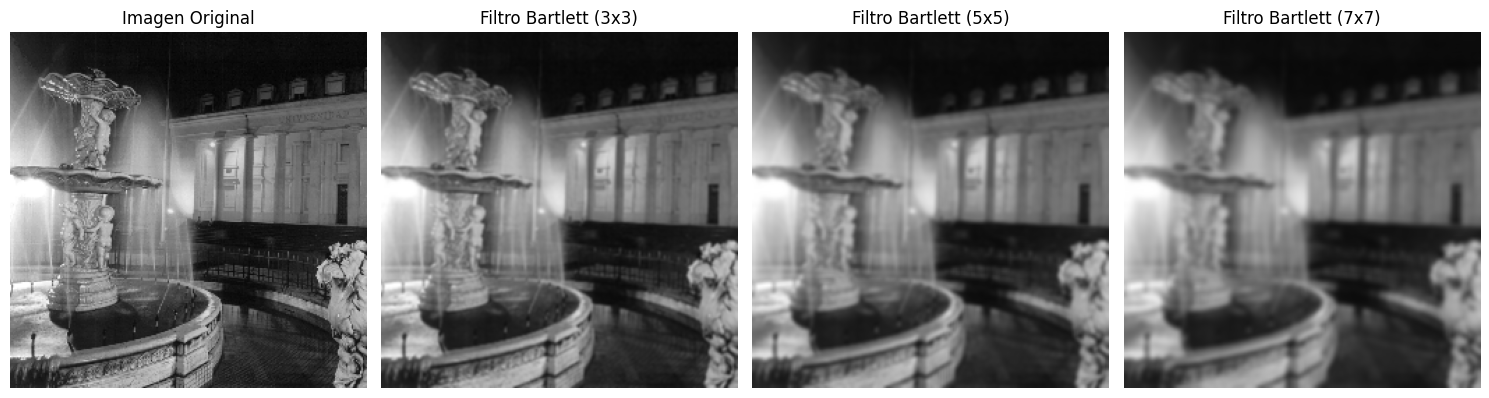

In [5]:
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Cargar imagen
img = imageio.imread('../IMAGENES/fuente.bmp') / 255.0

# Definir kernels de Bartlett
kernel_3x3 = np.array([[1,2,1],
                        [2,4,2],
                        [1,2,1]]) /16.0

kernel_5x5 = np.array([[1,2,3,2,1],
                        [2,4,6,4,2],
                        [3,6,9,6,3],
                        [2,4,6,4,2],
                        [1,2,3,2,1]]) /81.0

kernel_7x7 = np.array([[1,2,3,4,3,2,1],
                        [2,4,6,8,6,4,2],
                        [3,6,9,12,9,6,3],
                        [4,8,12,16,12,8,4],
                        [3,6,9,12,9,6,3],
                        [2,4,6,8,6,4,2],
                        [1,2,3,4,3,2,1]]) /256.0

# Aplicar la convolución con cada kernel
if img.ndim == 3: 
    img_convolucionada_3x3 = np.zeros_like(img)
    img_convolucionada_5x5 = np.zeros_like(img)
    img_convolucionada_7x7 = np.zeros_like(img)

    for c in range(img.shape[2]):
        img_convolucionada_3x3[:, :, c] = convolve(img[:, :, c], kernel_3x3)
        img_convolucionada_5x5[:, :, c] = convolve(img[:, :, c], kernel_5x5)
        img_convolucionada_7x7[:, :, c] = convolve(img[:, :, c], kernel_7x7)
else:
    img_convolucionada_3x3 = convolve(img , kernel_3x3)
    img_convolucionada_5x5 = convolve(img , kernel_5x5)
    img_convolucionada_7x7 = convolve(img , kernel_7x7)

# Mostrar imágenes originales y filtradas
plt.figure(figsize=(15, 5))
def mostrarImg(x,title,nombre):
    plt.subplot(1,4,x)
    plt.imshow(nombre, cmap='gray')
    plt.title(title)
    plt.axis('off')

mostrarImg(1,'Imagen Original',img)
mostrarImg(2,'Filtro Bartlett (3x3)',img_convolucionada_3x3)
mostrarImg(3,'Filtro Bartlett (5x5)',img_convolucionada_5x5)
mostrarImg(4,'Filtro Bartlett (7x7)',img_convolucionada_7x7)


plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.027927983955190333..1.0000000000000004].


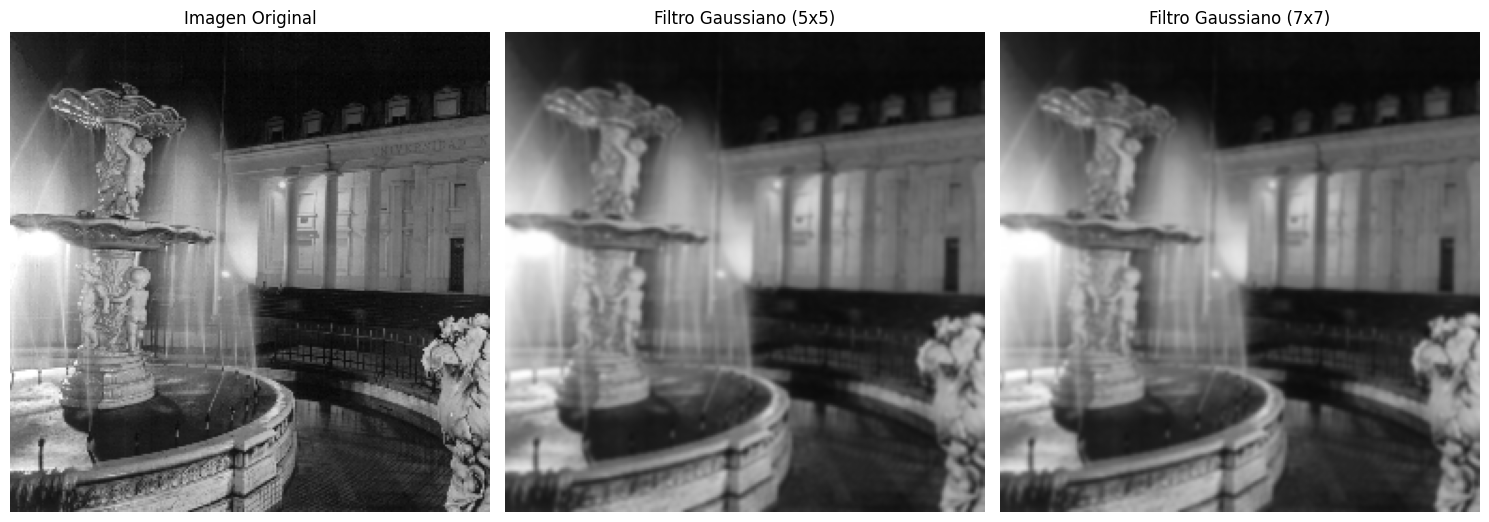

In [6]:
import numpy as np
import imageio.v3 as imageio
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Cargar imagen
img = imageio.imread('../IMAGENES/fuente.bmp') / 255.0  # Normalizar la imagen

# Definir kernel Gaussiano 5x5
def gaussian_kernel(size, sigma=1):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma ** 2)) * 
                     np.exp(-((x - (size-1)/2) ** 2 + (y - (size-1)/2) ** 2) / (2 * sigma ** 2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

# Crear kernels Gaussianos
kernel_5x5 = gaussian_kernel(5, sigma=1)
kernel_7x7 = gaussian_kernel(7, sigma=1)

# Aplicar convolución con el filtro Gaussiano 5x5
if img.ndim == 3:  # Imagen con múltiples canales (RGB o RGBA)
    img_convolucionada_5x5 = np.zeros_like(img)
    for c in range(img.shape[2]):
        img_convolucionada_5x5[:, :, c] = convolve(img[:, :, c], kernel_5x5)
else:  # Imagen en escala de grises
    img_convolucionada_5x5 = convolve(img, kernel_5x5)

# Aplicar convolución con el filtro Gaussiano 7x7
if img.ndim == 3:  # Imagen con múltiples canales (RGB o RGBA)
    img_convolucionada_7x7 = np.zeros_like(img)
    for c in range(img.shape[2]):
        img_convolucionada_7x7[:, :, c] = convolve(img[:, :, c], kernel_7x7)
else:  # Imagen en escala de grises
    img_convolucionada_7x7 = convolve(img, kernel_7x7)

# Mostrar imágenes originales y filtradas
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_convolucionada_5x5)
plt.title('Filtro Gaussiano (5x5)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_convolucionada_7x7)
plt.title('Filtro Gaussiano (7x7)')
plt.axis('off')

plt.tight_layout()
plt.show()

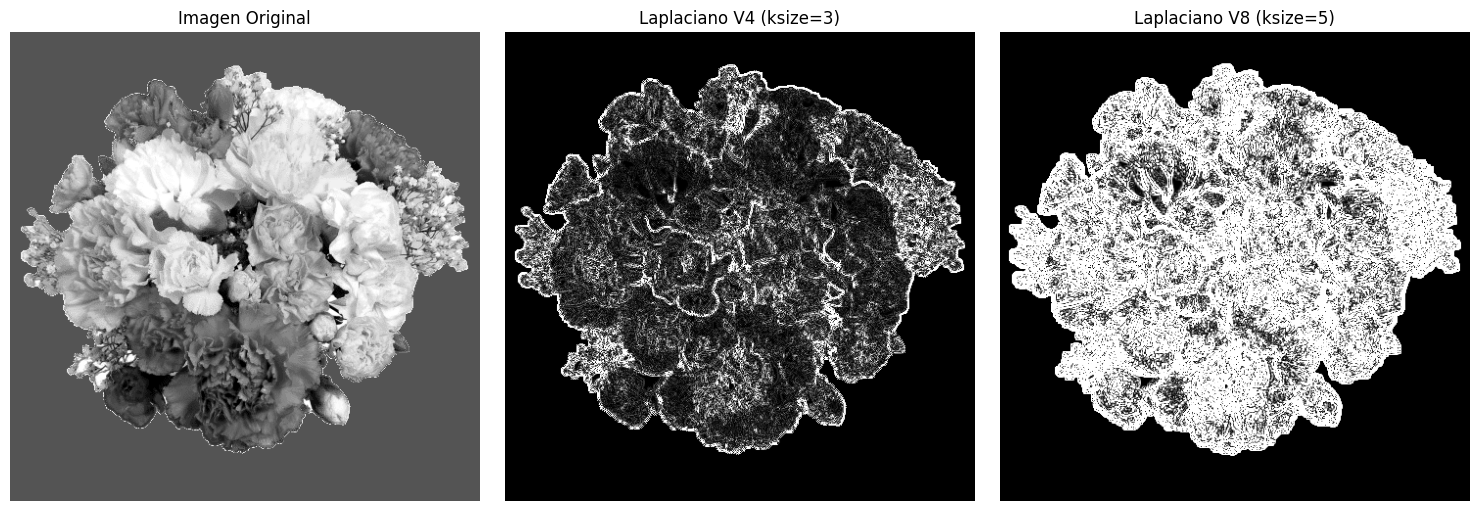

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('../IMAGENES/flores.png', 0)  # Cargar en escala de grises

# Aplicar el filtro Laplaciano V4 (ksize=3)
laplacian_v4 = cv2.Laplacian(img, cv2.CV_64F, ksize=3)

# Aplicar el filtro Laplaciano V8 (ksize=5)
laplacian_v8 = cv2.Laplacian(img, cv2.CV_64F, ksize=5)

# Convertir a uint8
laplacian_v4_abs = cv2.convertScaleAbs(laplacian_v4)
laplacian_v8_abs = cv2.convertScaleAbs(laplacian_v8)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(laplacian_v4_abs, cmap='gray')
plt.title('Laplaciano V4 (ksize=3)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(laplacian_v8_abs, cmap='gray')
plt.title('Laplaciano V8 (ksize=5)')
plt.axis('off')

plt.tight_layout()
plt.show()

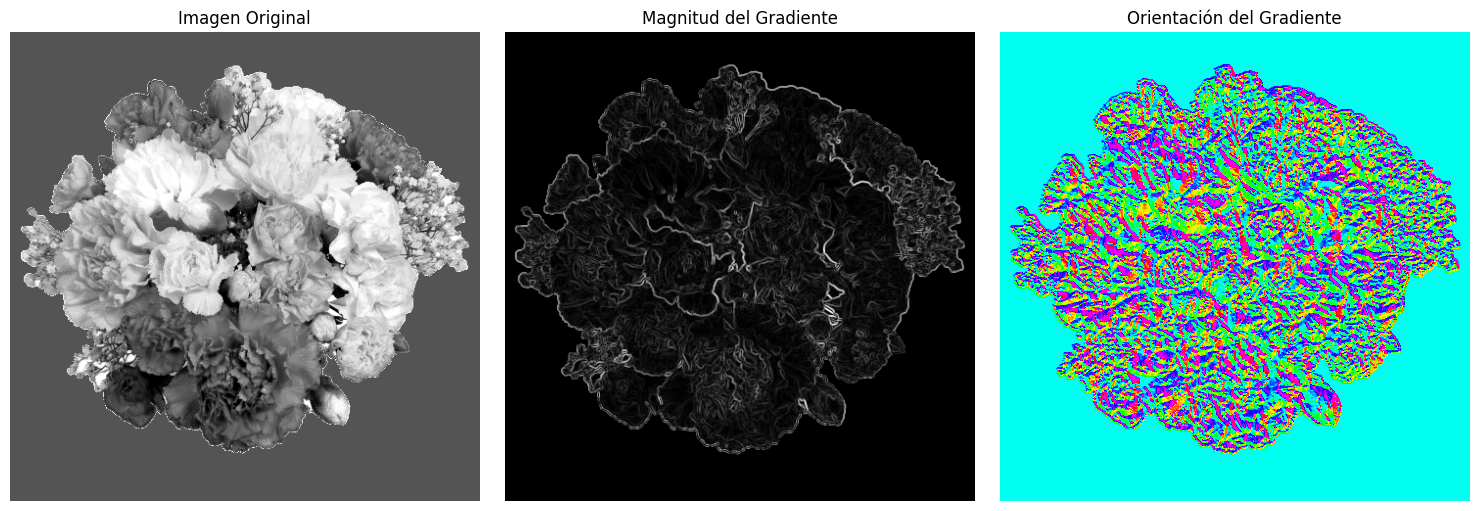

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen
img = cv2.imread('../IMAGENES/flores.png', cv2.IMREAD_GRAYSCALE) 

# Aplicar el filtro Sobel en X e Y
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Calcular la magnitud y la orientación
magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
orientation = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)  # Convertir a grados

# Normalizar la magnitud para visualización
magnitude = cv2.normalize(magnitude, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
magnitude = np.uint8(magnitude)

# Mostrar resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude, cmap='gray')
plt.title('Magnitud del Gradiente')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(orientation, cmap='hsv') # Mostrar orientación como un mapa de colores
plt.title('Orientación del Gradiente')
plt.axis('off')

plt.tight_layout()
plt.show()